In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import mixture
from sklearn import metrics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#read in 2015-2022 datasets, add year column, add rank to years that don't have rank, clean column names 
df_15 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2015.csv')
df_15["Year"] = 2015
df_15.rename(columns = {'Family':'Social support'}, inplace = True)

df_16 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2016.csv')
df_16["Year"] = 2016
df_16.rename(columns = {'Family':'Social support'}, inplace = True)

df_17 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2017.csv')
df_17["Year"] = 2017
df_17. rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score',
                         'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                         'Health..Life.Expectancy.':'Health (Life Expectancy)',
                         'Trust..Government.Corruption.':'Trust (Government Corruption)',
                        'Dystopia.Residual':'Dystopia Residual',
                        'Family':'Social support'}, inplace = True)

df_18 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2018.csv')
df_18["Year"] = 2018
df_18. rename(columns = {'Overall rank':'Happiness Rank', 'Score':'Happiness Score',
                         'Country or region':'Country',
                         'GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)

df_19 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2019.csv')
df_19["Year"] = 2019
df_19. rename(columns = {'Overall rank':'Happiness Rank', 'Score':'Happiness Score',
                         'Country or region':'Country',
                         'GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)
df_20 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2020.csv')
df_20["Year"] = 2020
df_20.rename(columns = {'Ladder score':'Happiness Score',
                         'Country name':'Country',
                         'Logged GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                       'Dystopia + residual':'Dystopia Residual'}, inplace = True)
df_20['Happiness Rank'] = df_20['Happiness Score'].rank(ascending=False)

df_21 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2021.csv')
df_21["Year"] = 2021
df_21.rename(columns = {'Ladder score':'Happiness Score',
                         'Country name':'Country',
                         'Logged GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                       'Dystopia + residual':'Dystopia Residual'}, inplace = True)
df_21['Happiness Rank'] = df_21['Happiness Score'].rank(ascending=False)


df_22 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2022.csv')
df_22["Year"] = 2022

In [3]:
#merge datasets
df = pd.concat([df_15, df_16, df_17, df_18, df_19])

list(df.columns) #will have to clean up column names so that they can merge properly
df = df.iloc[:, 0:13]
df = df.drop(['Region','Standard Error'], 1)

C:\Users\Lucky\AppData\Local\Temp/ipykernel_6344/536193168.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['Region','Standard Error'], 1)


In [4]:
#rescale happiness scores
X = df["Happiness Score"].values.reshape(-1, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # do scaling
df["Happiness Score"] = X_scaled

In [5]:
#add column to categorize happiness scores as low, medium, and high
df["Score Category"] = pd.cut(df["Happiness Score"], bins=[0, .5, 1.0], 
                              right=False, labels=['low', 'high'])

#remove rows with NA values
df = df.dropna()

In [9]:
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Score Category
0,Switzerland,1,0.964145,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015,high
1,Iceland,2,0.959023,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015,high
2,Denmark,3,0.952325,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015,high
3,Norway,4,0.951340,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015,high
4,Canada,5,0.932624,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015,high
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,0.153270,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017,low
151,Syria,152,0.151497,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017,low
152,Tanzania,153,0.129236,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017,low
153,Burundi,154,0.041765,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017,low


In [12]:
#df1 = df.copy()
#df1_a = df1[(df1.ScoreCategory == 'low') | (df3.ScoreCategory == 'high') ] 
#df1_b = df1_a[['P', 'Species' ]]
df1 = df.copy()
df1 = df1[[ 'Happiness Score', 'Score Category']]
df1

,Happiness Score,Score Category
0,0.964145,high
1,0.959023,high
2,0.952325,high
3,0.951340,high
4,0.932624,high
...,...,...
150,0.153270,low
151,0.151497,low
152,0.129236,low
153,0.041765,low


In [25]:
X = df1['Happiness Score'].to_numpy()
nrows = X.shape[0]
X.shape = (nrows, 1)
y = (df1['Score Category'] == 'high').to_numpy().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = linear_model.LogisticRegression().fit(X_train, y_train)


The model is P(Score Category = 'high' | x) = f(x) = 1 / (1 + exp(-(9.38 *x + -4.73))).
Training accuracy = 0.989, test accuracy = 0.983.


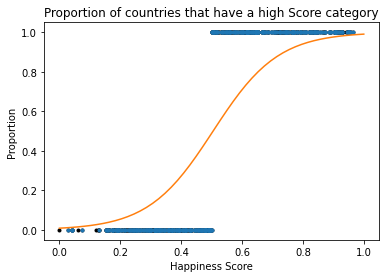

In [47]:

model.fit(X, y)
plt.plot(X, y, '.', color='black', label='data (many duplicates)')
plt.plot(X_train,y_train, '.')

plt.ylabel('Proportion')
plt.xlabel('Happiness Score')
plt.title('Proportion of countries that have a high Score category')

low = 0.0
high = 1.0
margin = 0.1

b = model.intercept_
w = model.coef_[0]
xplot = np.linspace(start=low, stop=high)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot)

b_1 = float(b)
w_1 = float(w)

x_values, x_counts = np.unique(X, return_counts=True)
n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(y[X[:, 0] == x_values[i]]) / x_counts[i]

probs = model.predict_proba(X)[:, 0] 

train_a = model.score(X_train, y_train)

test_a = model.score(X_test, y_test)

yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)


print(f'The model is P(Score Category = \'high\' | x) = f(x) = 1 / (1 + exp(-({w_1:.3} *x + {b_1:.3}))).')
print(f'Training accuracy = {train_a:.3}, test accuracy = {test_a:.3}.')

